In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Datasets/AirQualityUCI.xlsx')
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [19]:
df['DateTime'] = df['Date'].astype('str') + ' ' + df['Time'].astype('str')

In [20]:
df['DateTime'] = pd.to_datetime(df['DateTime'])

In [21]:
df.set_index('DateTime', inplace=True)

## Check for any missing datetime in the index

In [ ]:
df.index.max() , df.index.min()

(Timestamp('2005-04-04 14:00:00'), Timestamp('2004-03-10 18:00:00'))

In [ ]:
df.index.max() - df.index.min()

Timedelta('389 days 20:00:00')

In [ ]:
print('Total number of observations in the dataframe: ', df.shape[0])
print('Total counted datetime: ', (389 * 24 + 20))

Total number of observations in the dataframe:  9357
Total counted datetime:  9356


In [ ]:
# this will print any missing datetime in dataframe df
pd.date_range(start = df.index.min(), end = df.index.min(), freq='H').difference(df.index)

DatetimeIndex([], dtype='datetime64[ns]', freq=None)

In [ ]:
print(df.index.inferred_freq)

H


In [ ]:
m = df.copy()

In [ ]:
m.drop(['2004-03-10 19:00:00', '2004-03-10 21:00:00', '2005-04-04 13:00:00'], inplace=True)

In [ ]:
m.shape

(9354, 15)

In [ ]:
# this will print any missing datetime in dataframe m
pd.date_range(start =m.index.min(), end =m.index.max(), freq='H').difference(m.index)

DatetimeIndex(['2004-03-10 19:00:00', '2004-03-10 21:00:00',
               '2005-04-04 13:00:00'],
              dtype='datetime64[ns]', freq=None)

In [ ]:
m.index.inferred_freq

<b>So the dataset has no missing time index.</b>

# Feature Engineering

In [22]:
df.replace(-200, np.nan, inplace=True)

In [23]:
# more than 90% of values are missing from NMHC(GT) column
df.drop('NMHC(GT)', axis=1, inplace=True)

In [24]:
df.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
       'T', 'RH', 'AH'],
      dtype='object')

In [25]:
for col in df.columns[2:]:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  upper_limit = Q3 + 1.5 * IQR
  lower_limit = Q1 - 1.5 * IQR
  df[col] = np.where(df[col]>upper_limit, upper_limit, np.where(df[col]<lower_limit, lower_limit, df[col]))


In [ ]:
# replacing missing values using linear interpolation
for col in df.columns[2:]:
  df[col] = df[col].interpolate()

In [ ]:
df.isna().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

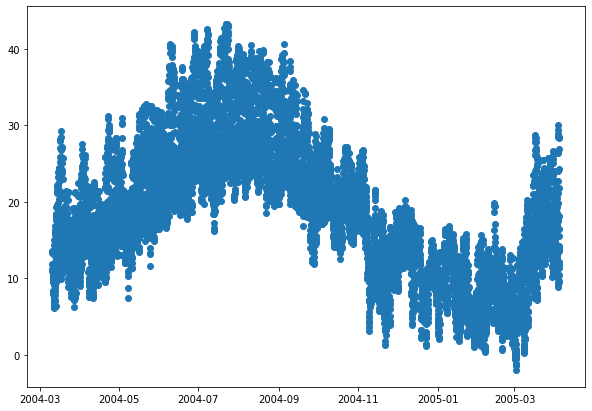

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(x=df.index, y=df['T'])

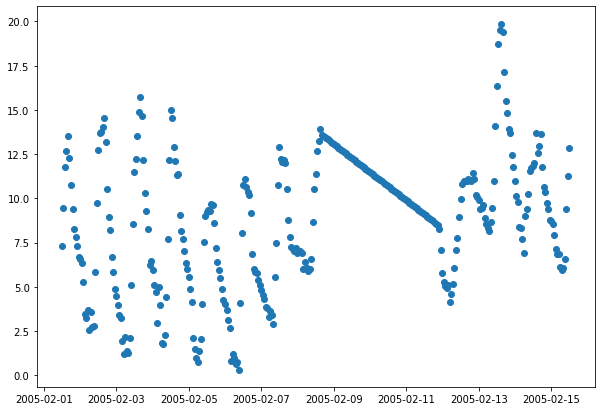

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(x=df['T'].loc['2005-02-01 12:00:00':'2005-02-15 12:00:00'].index, y=df['T'].loc['2005-02-01 12:00:00':'2005-02-15 12:00:00'])

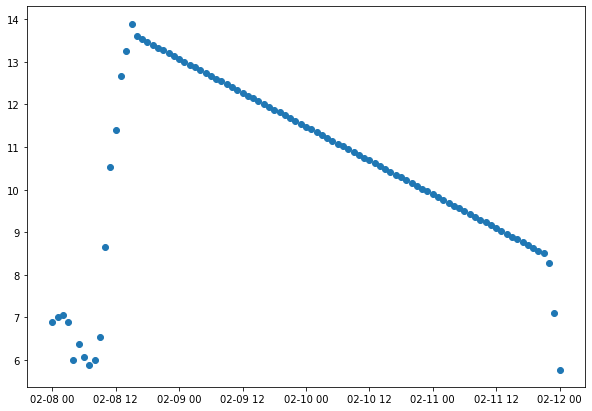

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(x=df['T'].loc['2005-02-08 00:00:00':'2005-02-12 00:00:00'].index, y=df['T'].loc['2005-02-08 00:00:00':'2005-02-12 00:00:00'])

<b>The straight line formed by a sequence of points on the above plot is because of values generated in place of NAN values by linear interpolation technique, where NAN values are substituted in place of -200 values.</b>

<b>Let's try other techniques to impute missing values.</b>

In [8]:
data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Datasets/AirQualityUCI.xlsx')
data['DateTime'] = data['Date'].astype('str') + ' ' + data['Time'].astype('str')
data['DateTime'] = pd.to_datetime(data['DateTime'])
data.set_index('DateTime', inplace=True)

In [9]:
data['T'].loc['2005-02-08 12:00:00':'2005-02-12 00:00:00'].head(10)

DateTime
2005-02-08 12:00:00     11.400
2005-02-08 13:00:00     12.675
2005-02-08 14:00:00     13.250
2005-02-08 15:00:00     13.900
2005-02-08 16:00:00     13.600
2005-02-08 17:00:00   -200.000
2005-02-08 18:00:00   -200.000
2005-02-08 19:00:00   -200.000
2005-02-08 20:00:00   -200.000
2005-02-08 21:00:00   -200.000
Name: T, dtype: float64

In [10]:
data.replace(-200, np.nan, inplace=True)

In [11]:
data.drop('NMHC(GT)', inplace=True, axis=1)

In [12]:
# treating outliers by flooring and capping
for col in data.columns[2:]:
  Q1 = data[col].quantile(0.25)
  Q3 = data[col].quantile(0.75)
  IQR = Q3 - Q1
  upper_limit = Q3 + 1.5 * IQR
  lower_limit = Q1 - 1.5 * IQR
  data[col] = np.where(data[col]>upper_limit, upper_limit, np.where(data[col]<lower_limit, lower_limit, data[col]))


In [13]:
d1 = data.copy()
d2 = data.copy()
d3 = data.copy()
d4 = data.copy()
d5 = data.copy()
d6 = data.copy()
d7 = data.copy()
d8 = data.copy()
d9 = data.copy()
d10 = data.copy()

In [18]:
# replacing missing values using spline interpolation
for col in d1.columns[2:]:
  d1[col] = d1[col].interpolate(method='spline', order=3)

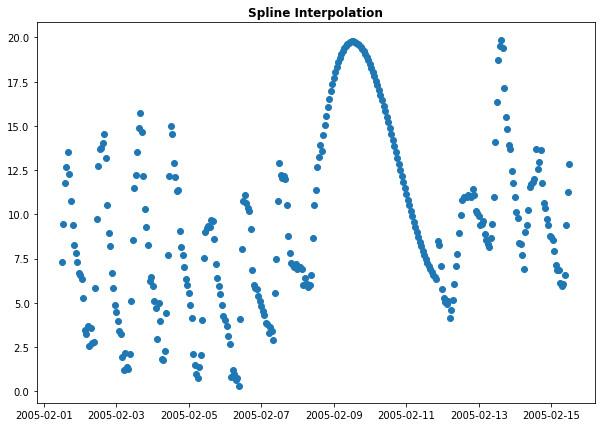

In [19]:
plt.figure(figsize=(10,7))
plt.title('Spline Interpolation', fontweight='bold')
plt.scatter(x=d1['T'].loc['2005-02-01 12:00:00':'2005-02-15 12:00:00'].index, y=d1['T'].loc['2005-02-01 12:00:00':'2005-02-15 12:00:00'])

In [ ]:
# replacing missing values using quadratic interpolation
for col in d2.columns[2:]:
  d2[col] = d2[col].interpolate(method='quadratic')

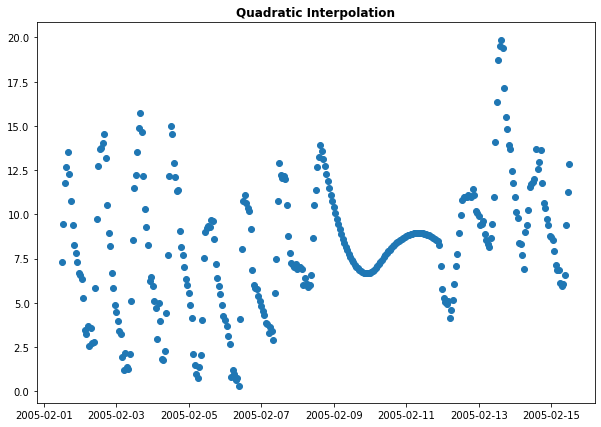

In [ ]:
plt.figure(figsize=(10, 7))
plt.title('Quadratic Interpolation', fontweight='bold')
plt.scatter(x=d2['T'].loc['2005-02-01 12:00:00':'2005-02-15 12:00:00'].index, y=d2['T'].loc['2005-02-01 12:00:00':'2005-02-15 12:00:00'])

In [ ]:
# replacing missing values using barycentric interpolation
for col in d3.columns[2:]:
  d3[col] = d3[col].interpolate(method='barycentric')

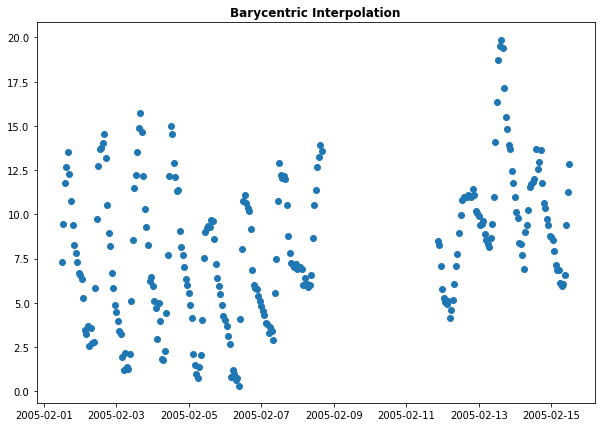

In [ ]:
plt.figure(figsize=(10, 7))
plt.title('Barycentric Interpolation', fontweight='bold')
plt.scatter(x=d3['T'].loc['2005-02-01 12:00:00':'2005-02-15 12:00:00'].index, y=d3['T'].loc['2005-02-01 12:00:00':'2005-02-15 12:00:00'])

In [ ]:
# replacing missing values using cubic interpolation
for col in d4.columns[2:]:
  d4[col] = d4[col].interpolate(method='cubic')

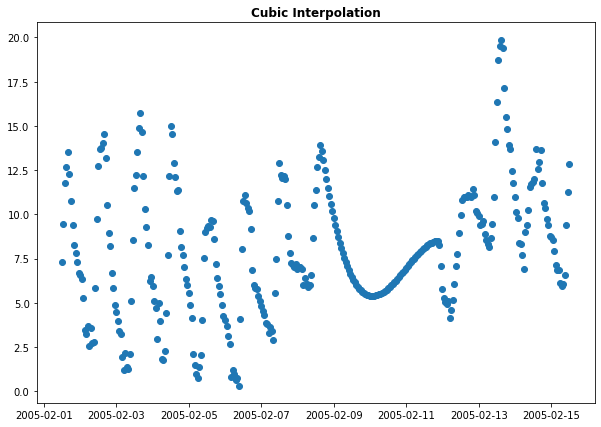

In [ ]:
plt.figure(figsize=(10, 7))
plt.title('Cubic Interpolation', fontweight='bold')
plt.scatter(x=d4['T'].loc['2005-02-01 12:00:00':'2005-02-15 12:00:00'].index, y=d4['T'].loc['2005-02-01 12:00:00':'2005-02-15 12:00:00'])

In [ ]:
# replacing missing values using nearest interpolation
for col in d5.columns[2:]:
  d5[col] = d5[col].interpolate(method='nearest')

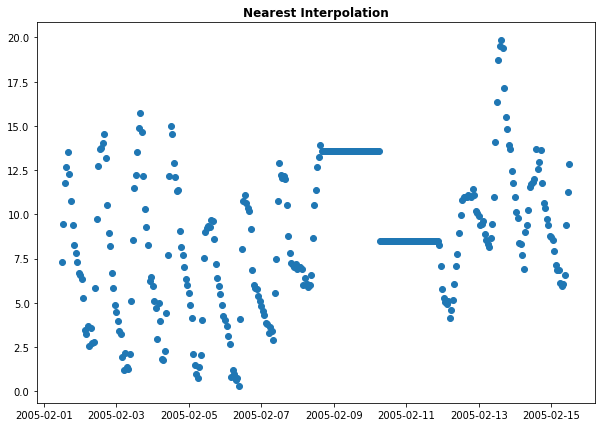

In [ ]:
plt.figure(figsize=(10, 7))
plt.title('Nearest Interpolation', fontweight='bold')
plt.scatter(x=d5['T'].loc['2005-02-01 12:00:00':'2005-02-15 12:00:00'].index, y=d5['T'].loc['2005-02-01 12:00:00':'2005-02-15 12:00:00'])

In [ ]:
# akima interpolation
for col in d6.columns[2:]:
  d6[col] = d6[col].interpolate(method='akima')

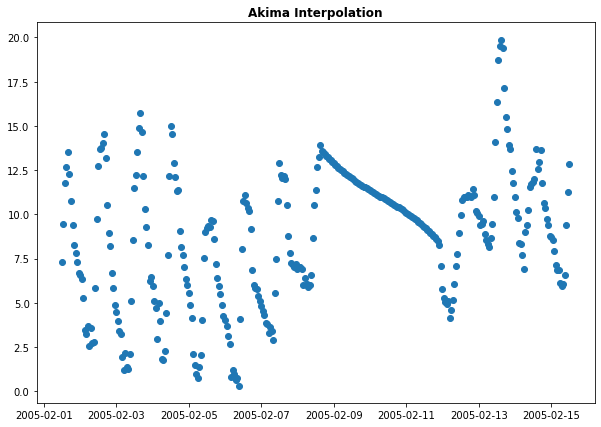

In [ ]:
plt.figure(figsize=(10, 7))
plt.title('Akima Interpolation', fontweight='bold')
plt.scatter(x=d6['T'].loc['2005-02-01 12:00:00':'2005-02-15 12:00:00'].index, y=d6['T'].loc['2005-02-01 12:00:00':'2005-02-15 12:00:00'])

In [ ]:
# slinear interpolation
for col in d7.columns[2:]:
  d7[col] = d7[col].interpolate(method='slinear')

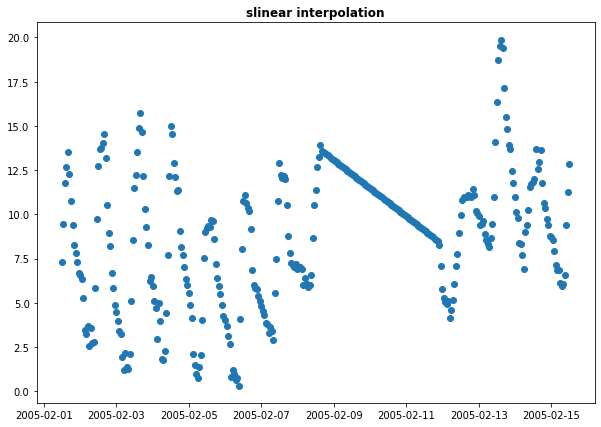

In [ ]:
plt.figure(figsize=(10, 7))
plt.title('slinear interpolation', fontweight='bold')
plt.scatter(x=d7['T'].loc['2005-02-01 12:00:00':'2005-02-15 12:00:00'].index, y=d7['T'].loc['2005-02-01 12:00:00':'2005-02-15 12:00:00'])

In [ ]:
# replace missing values using rolling mean
d8['T_rollingmean5'] = d8['T'].rolling(min_periods=1, center=True, window=82).mean()
d8['T_sma'] = d8['T_rollingmean5']
d8['T_sma'].update(d8['T']) # inplace operation

In [ ]:
d8.head(2)

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,T_rollingmean5,T_sma
DateTime,,,,,,,,,,,,,,,,
2004-03-10 18:00:00,2004-03-10,18:00:00,2.6,1360.00,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.6,48.875001,0.757754,9.600610,13.6
2004-03-10 19:00:00,2004-03-10,19:00:00,2.0,1292.25,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.3,47.700000,0.725487,9.713095,13.3


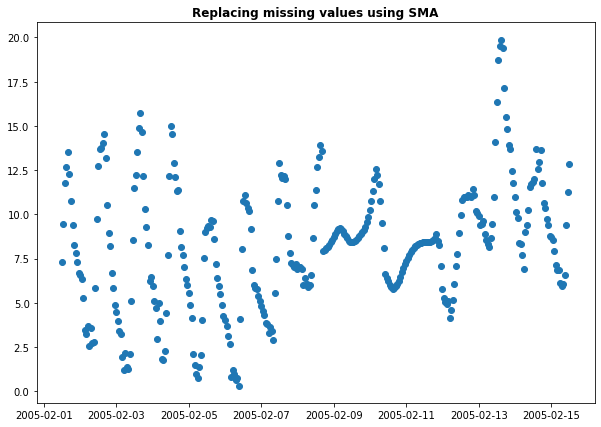

In [ ]:
plt.figure(figsize=(10, 7))
plt.title('Replacing missing values using SMA', fontweight='bold')
plt.scatter(x=d8['T'].loc['2005-02-01 12:00:00':'2005-02-15 12:00:00'].index, y=d8['T_sma'].loc['2005-02-01 12:00:00':'2005-02-15 12:00:00']);

In [ ]:
# using exponentially weighted moving average
d9['T'] = d9['T'].ewm(halflife=5).mean()

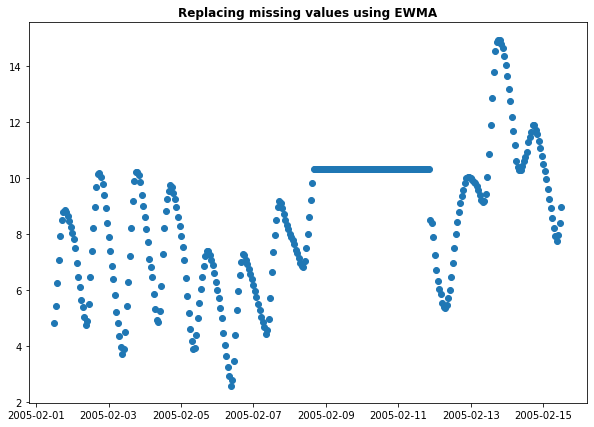

In [ ]:
plt.figure(figsize=(10, 7))
plt.title('Replacing missing values using EWMA', fontweight='bold')
plt.scatter(x=d9['T'].loc['2005-02-01 12:00:00':'2005-02-15 12:00:00'].index, y=d9['T'].loc['2005-02-01 12:00:00':'2005-02-15 12:00:00'])

In [14]:
# Filling missing values by the hourly median of each month
d10['Month'] = d10.Date.dt.month
d10['T_median'] = d10.groupby(['Month', 'Time'])['T'].transform(lambda x:x.fillna(x.median()))

In [15]:
d10[['T', 'T_median']].loc['2005-02-08 12:00:00':'2005-02-12 12:00:00'].head(10)

,T,T_median
DateTime,,
2005-02-08 12:00:00,11.400,11.4000
2005-02-08 13:00:00,12.675,12.6750
2005-02-08 14:00:00,13.250,13.2500
2005-02-08 15:00:00,13.900,13.9000
2005-02-08 16:00:00,13.600,13.6000
2005-02-08 17:00:00,NaN,9.9125
2005-02-08 18:00:00,NaN,8.5500
2005-02-08 19:00:00,NaN,7.7125
2005-02-08 20:00:00,NaN,7.3750


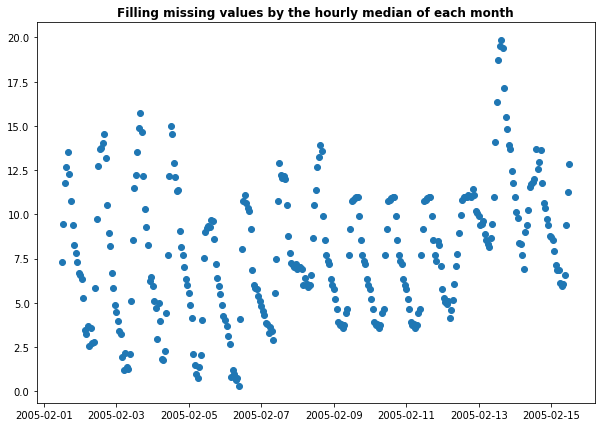

In [16]:
plt.figure(figsize=(10, 7))
plt.title('Filling missing values by the hourly median of each month', fontweight='bold')
plt.scatter(x=d10['T_median'].loc['2005-02-01 12:00:00':'2005-02-15 12:00:00'].index, y=d10['T_median'].loc['2005-02-01 12:00:00':'2005-02-15 12:00:00']);


<b>Imputing missing values using the hourly median of each month is doing quite decent job as compared to others....  so ww'll go with it to substitute missing values in other columns too.</b>

In [26]:
# Filling missing values by the hourly median of each month
data['Month'] = data.Date.dt.month
for col in data.columns:
  if col not in ['Date', 'Time', 'Month']:
    data[col+'_median'] = data.groupby(['Month', 'Time'])[col].transform(lambda x:x.fillna(x.median()))

In [27]:
data.isna().sum()

Date                       0
Time                       0
CO(GT)                  1683
PT08.S1(CO)              366
C6H6(GT)                 366
PT08.S2(NMHC)            366
NOx(GT)                 1639
PT08.S3(NOx)             366
NO2(GT)                 1642
PT08.S4(NO2)             366
PT08.S5(O3)              366
T                        366
RH                       366
AH                       366
Month                      0
CO(GT)_median             31
PT08.S1(CO)_median         0
C6H6(GT)_median            0
PT08.S2(NMHC)_median       0
NOx(GT)_median           274
PT08.S3(NOx)_median        0
NO2(GT)_median           274
PT08.S4(NO2)_median        0
PT08.S5(O3)_median         0
T_median                   0
RH_median                  0
AH_median                  0
dtype: int64

In [28]:
data['CO(GT)'] = data['CO(GT)_median']
data['PT08.S1(CO)'] = data['PT08.S1(CO)_median']
data['C6H6(GT)'] = data['C6H6(GT)_median']
data['PT08.S2(NMHC)'] = data['PT08.S2(NMHC)_median']
data['NOx(GT)'] = data['NOx(GT)_median']
data['PT08.S3(NOx)'] = data['PT08.S3(NOx)_median'] 
data['NO2(GT)'] = data['NO2(GT)_median']
data['PT08.S4(NO2)'] = data['PT08.S4(NO2)_median']
data['PT08.S5(O3)'] = data['PT08.S5(O3)_median']
data['T'] = data['T_median']
data['RH'] = data['RH_median'] 
data['AH'] = data['AH_median']

In [29]:
data.drop(['CO(GT)_median', 'PT08.S1(CO)_median', 'C6H6(GT)_median', 'PT08.S2(NMHC)_median', 'NOx(GT)_median', 'PT08.S3(NOx)_median', 
           'NO2(GT)_median', 'PT08.S4(NO2)_median', 'PT08.S5(O3)_median', 'T_median', 'AH_median', 'RH_median'], axis=1, inplace=True)

In [30]:
data.isna().sum()

Date               0
Time               0
CO(GT)            31
PT08.S1(CO)        0
C6H6(GT)           0
PT08.S2(NMHC)      0
NOx(GT)          274
PT08.S3(NOx)       0
NO2(GT)          274
PT08.S4(NO2)       0
PT08.S5(O3)        0
T                  0
RH                 0
AH                 0
Month              0
dtype: int64

In [31]:
data.loc[data['CO(GT)'].isnull()]

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Month
DateTime,,,,,,,,,,,,,,,
2004-05-01 04:00:00,2004-05-01,04:00:00,NaN,882.25,3.542514,684.75,35.0,1133.5000,42.0,1492.00,672.75,16.175000,69.900000,1.275573,5
2004-05-02 04:00:00,2004-05-02,04:00:00,NaN,854.25,3.297505,670.25,26.0,1141.2500,35.0,1460.00,683.50,14.825000,65.800001,1.102810,5
2004-05-03 04:00:00,2004-05-03,04:00:00,NaN,875.50,1.528069,547.00,25.0,1256.2500,33.0,1351.00,504.75,15.950000,61.374999,1.104294,5
2004-05-04 04:00:00,2004-05-04,04:00:00,NaN,880.75,1.519090,546.25,21.0,1334.5000,28.0,1465.00,457.75,15.550000,81.025002,1.421615,5
2004-05-05 04:00:00,2004-05-05,04:00:00,NaN,866.50,2.059523,588.50,28.0,1266.7500,41.0,1439.00,468.25,14.675000,74.099998,1.230171,5
2004-05-06 04:00:00,2004-05-06,04:00:00,NaN,758.25,1.186720,517.00,15.0,1436.3125,22.0,1294.00,350.75,13.100000,67.125000,1.007936,5
2004-05-07 04:00:00,2004-05-07,04:00:00,NaN,831.00,2.246786,602.00,32.0,1269.0000,41.0,1385.75,535.25,14.000000,67.825001,1.078724,5
2004-05-08 04:00:00,2004-05-08,04:00:00,NaN,771.75,1.200205,518.25,30.0,1436.3125,41.0,1202.25,343.25,10.875000,67.549998,0.878532,5
2004-05-09 04:00:00,2004-05-09,04:00:00,NaN,1024.75,8.369357,914.25,30.0,855.7500,41.0,1605.00,1003.00,12.325000,68.049999,0.972180,5


In [32]:
data.loc[data['NOx(GT)'].isnull()]

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Month
DateTime,,,,,,,,,,,,,,,
2004-05-01 03:00:00,2004-05-01,03:00:00,1.3,1009.25,6.280934,824.75,NaN,950.00,NaN,1628.50,937.75,15.650,73.075001,1.290231,5
2004-05-02 03:00:00,2004-05-02,03:00:00,1.6,999.75,6.573944,838.00,NaN,909.50,NaN,1580.00,942.00,14.850,67.625000,1.135192,5
2004-05-03 03:00:00,2004-05-03,03:00:00,0.4,871.50,1.734437,563.75,NaN,1284.00,NaN,1385.00,493.50,15.600,65.250000,1.148449,5
2004-05-04 03:00:00,2004-05-04,03:00:00,0.4,872.50,1.498227,544.50,NaN,1307.50,NaN,1471.00,497.00,15.650,81.000002,1.430156,5
2004-05-05 03:00:00,2004-05-05,03:00:00,0.5,841.50,1.753459,565.25,NaN,1326.75,NaN,1398.75,436.50,15.475,66.949999,1.169125,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-02-24 03:00:00,2005-02-24,03:00:00,0.7,894.50,1.498227,544.50,NaN,1079.75,NaN,963.50,684.75,4.250,80.950001,0.676972,2
2005-02-25 03:00:00,2005-02-25,03:00:00,1.1,1009.75,3.444460,679.00,NaN,854.00,NaN,1045.75,889.25,5.000,82.949999,0.730029,2
2005-02-26 03:00:00,2005-02-26,03:00:00,2.1,1082.00,6.680370,842.75,NaN,728.75,NaN,1061.25,1089.75,2.775,73.975000,0.559097,2


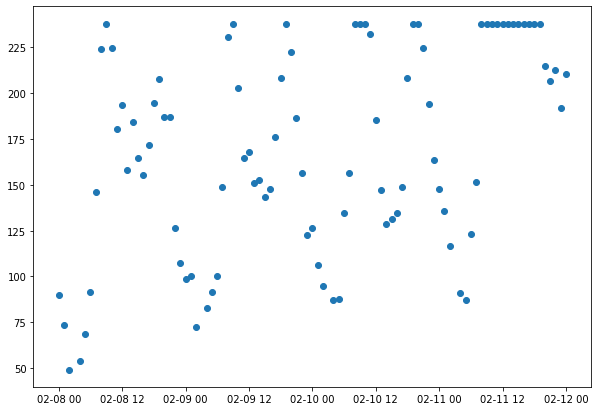

In [33]:
plt.figure(figsize=(10,7))
plt.scatter(x=data['NO2(GT)'].loc['2005-02-08 00:00:00':'2005-02-12 00:00:00'].index, y=data['NO2(GT)'].loc['2005-02-08 00:00:00':'2005-02-12 00:00:00'])

In [34]:
# now rest of the missing values can be filled using interpolation
for col in ['CO(GT)', 'NO2(GT)', 'NOx(GT)']:
  data[col] = data[col].interpolate()

In [35]:
data.isna().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
Month            0
dtype: int64

Finally, the data has no missing values.

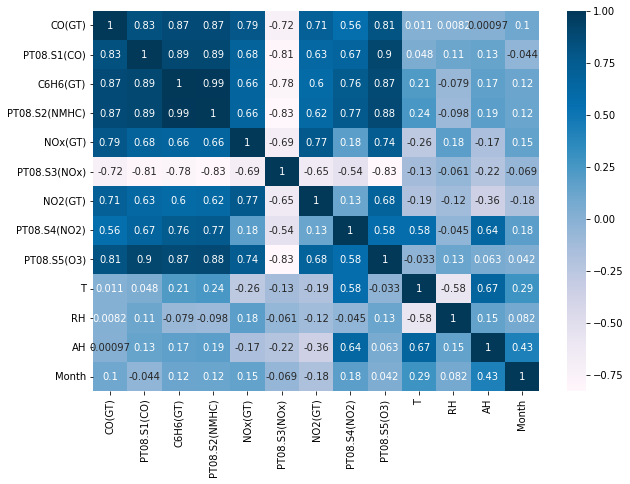

In [36]:
plt.figure(figsize=(10, 7))
sns.heatmap(data.corr(), annot=True, cmap='PuBu');

In [37]:
# create a dataframe df using Date, Time and only the highly correlated features with temperature 'T' from dataframe 'data'
df = data[['Date', 'Time', 'PT08.S4(NO2)', 'T', 'RH', 'AH', ]]

In [38]:
# create lag features
df[['PT08.S4_lag24', 'T_lag24', 'RH_lag24', 'AH_lag24']] = data[['PT08.S4(NO2)', 'T', 'RH', 'AH', ]].shift(24)

In [39]:
df.dropna(axis=0, inplace=True)

In [40]:
df.head()

,Date,Time,PT08.S4(NO2),T,RH,AH,PT08.S4_lag24,T_lag24,RH_lag24,AH_lag24
DateTime,,,,,,,,,,
2004-03-11 18:00:00,2004-03-11,18:00:00,2083.00,10.350,64.174999,0.806544,1692.00,13.60,48.875001,0.757754
2004-03-11 19:00:00,2004-03-11,19:00:00,2332.50,9.650,69.300001,0.831921,1558.75,13.30,47.700000,0.725487
2004-03-11 20:00:00,2004-03-11,20:00:00,2191.25,9.650,67.750000,0.813314,1554.50,11.90,53.975000,0.750239
2004-03-11 21:00:00,2004-03-11,21:00:00,1706.50,9.125,63.974999,0.741924,1583.75,11.00,60.000000,0.786713
2004-03-11 22:00:00,2004-03-11,22:00:00,1332.50,8.175,63.400000,0.690484,1490.00,11.15,59.575001,0.788794


# Modeling

In [42]:
def mean_absolute_percentage_error(actual, predicted):
  mape = np.sum(np.abs((actual-predicted)/actual)) * 1/len(actual) * 100
  return mape 

In [43]:
def over_under_forecast(actual, predicted):
    over_forecast = 0
    under_forecast = 0
    exact_forecast = 0
    for i in range(len(actual)):
        if actual[i] > predicted[i]:
            under_forecast+=1
        elif actual[i] < predicted[i]:
            over_forecast += 1
        else:
              exact_forecast+=1
    return (over_forecast, under_forecast, exact_forecast)

### Multivariate Forecasting - Linear Regression and Random Forest with AH, RH and PT08.S4(NO2)

In [119]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.model_selection import TimeSeriesSplit, RandomizedSearchCV, GridSearchCV, cross_val_score


In [45]:
# Using lag features
X = df[['PT08.S4_lag24', 'T_lag24', 'RH_lag24', 'AH_lag24']]
y = df['T']

In [46]:
X.shape

(9333, 4)

In [47]:
# train_test_split
train_X, train_y = X.iloc[:-1200], y.iloc[:-1200]
test_X, test_y = X.iloc[-1200:], y.iloc[-1200:]

In [48]:
train_X.shape, test_X.shape

((8133, 4), (1200, 4))

In [49]:
# 5-fold cross validation
tscv = TimeSeriesSplit(n_splits=5, test_size=1200)

In [91]:
# Linear Regression
avg_mape = []
for fold, (train_index, test_index) in enumerate(tscv.split(train_X)):
  print("Fold: {}".format(fold))
  print("\tTRAIN indices:", train_index)
  print("\tTEST indices:", test_index)
  X_train, X_test = train_X.iloc[train_index, :], train_X.iloc[test_index,:]
  y_train, y_test = train_y.iloc[train_index], train_y.iloc[test_index]

  # Construct a pipeline with standard scaler and Linear Regression
  pipeline_lr = Pipeline(steps = [('scaler', StandardScaler()),
                               ('lr', LinearRegression())])
  pipeline_lr.fit(X_train, y_train)
  y_pred = pipeline_lr.predict(X_test)
  mae = mean_absolute_error(y_test, y_pred)
  mape = mean_absolute_percentage_error(y_test, y_pred)
  avg_mape.append(mape)
  print('\tMAE on test set: %.3f' %mae)
  print('\tMAPE on test set: %.3f%%' %mape)
print('\nAverage MAPE: %.3f%%' %np.array(avg_mape).mean())

Fold: 0
	TRAIN indices: [   0    1    2 ... 2130 2131 2132]
	TEST indices: [2133 2134 2135 ... 3330 3331 3332]
	MAE on test set: 2.404
	MAPE on test set: 8.409%
Fold: 1
	TRAIN indices: [   0    1    2 ... 3330 3331 3332]
	TEST indices: [3333 3334 3335 ... 4530 4531 4532]
	MAE on test set: 1.834
	MAPE on test set: 6.516%
Fold: 2
	TRAIN indices: [   0    1    2 ... 4530 4531 4532]
	TEST indices: [4533 4534 4535 ... 5730 5731 5732]
	MAE on test set: 1.777
	MAPE on test set: 9.138%
Fold: 3
	TRAIN indices: [   0    1    2 ... 5730 5731 5732]
	TEST indices: [5733 5734 5735 ... 6930 6931 6932]
	MAE on test set: 2.527
	MAPE on test set: 29.337%
Fold: 4
	TRAIN indices: [   0    1    2 ... 6930 6931 6932]
	TEST indices: [6933 6934 6935 ... 8130 8131 8132]
	MAE on test set: 1.976
	MAPE on test set: 33.115%

Average MAPE: 17.303%


In [109]:
mean_absolute_percentage_error(pipeline_lr.predict(test_X), test_y)

39.27670137756768

In [120]:
over_under_forecast(test_y, pipeline_lr.predict(test_X))

(657, 543, 0)

In [121]:
eval_score = make_scorer(mean_absolute_percentage_error)

In [126]:
# DecisionTree 
pipeline_tree = Pipeline(steps = [('scaler', StandardScaler()),
                               ('dt', DecisionTreeRegressor(random_state=0))])
params = {
    'dt__criterion': ['absolute_error'],
    'dt__max_depth': [10, 15, 20],
    'dt__min_samples_split': [2, 5, 10],
    'dt__max_features': ['sqrt']
}
# GridSearchCV for hyperparameter tuning
gs = GridSearchCV(pipeline_tree, param_grid=params, cv=tscv, scoring=mean_absolute_percentage_error, verbose=1)
gs.fit(train_X, train_y)
best_model = gs.best_estimator_
print('\n',best_model)
print(cross_val_score(best_model, train_X, train_y, cv=tscv, scoring=eval_score))
print('\nAverage MAE %.3f%%' %np.array(cross_val_score(best_model, train_X, train_y, cv=tscv, scoring=eval_score)).mean())

Fitting 5 folds for each of 9 candidates, totalling 45 fits

 Pipeline(steps=[('scaler', StandardScaler()),
                ('dt',
                 DecisionTreeRegressor(criterion='absolute_error', max_depth=10,
                                       max_features='sqrt', random_state=0))])
[11.4724561   8.81028812 11.32095108 41.83708003 51.38055943]

Average MAE 24.964%


In [127]:
mean_absolute_percentage_error(best_model.predict(test_X), test_y)

29.249683804409415

In [95]:
# Random Forest
# empties the list
avg_mape.clear()
for fold, (train_index, test_index) in enumerate(tscv.split(train_X)):
  print("Fold: {}".format(fold))
  print("\tTRAIN indices:", train_index)
  print("\tTEST indices:", test_index)
  X_train, X_test = train_X.iloc[train_index, :], train_X.iloc[test_index,:]
  y_train, y_test = train_y.iloc[train_index], train_y.iloc[test_index]

  # Construct a pipeline with standard scaler and RF
  pipeline_rf = Pipeline(steps = [('scaler', StandardScaler()),
                               ('rf', RandomForestRegressor(max_depth=10, 
                                                            random_state=0,
                                                            min_samples_split=5,
                                                            max_features = 'sqrt',
                                                            n_estimators=100))])
  pipeline_rf.fit(X_train, y_train)
  y_pred = pipeline_rf.predict(X_test)
  mae = mean_absolute_error(y_test, y_pred)
  mape = mean_absolute_percentage_error(y_test, y_pred)
  avg_mape.append(mape)
  print('\tMAE on test set: %.3f' %mae)
  print('\tMAPE on test set: %.3f%%' %mape)
print("\nAverage MAPE: %.3f%%" %np.array(avg_mape).mean())   

Fold: 0
	TRAIN indices: [   0    1    2 ... 2130 2131 2132]
	TEST indices: [2133 2134 2135 ... 3330 3331 3332]
	MAE on test set: 3.211
	MAPE on test set: 10.913%
Fold: 1
	TRAIN indices: [   0    1    2 ... 3330 3331 3332]
	TEST indices: [3333 3334 3335 ... 4530 4531 4532]
	MAE on test set: 2.094
	MAPE on test set: 7.387%
Fold: 2
	TRAIN indices: [   0    1    2 ... 4530 4531 4532]
	TEST indices: [4533 4534 4535 ... 5730 5731 5732]
	MAE on test set: 1.876
	MAPE on test set: 9.603%
Fold: 3
	TRAIN indices: [   0    1    2 ... 5730 5731 5732]
	TEST indices: [5733 5734 5735 ... 6930 6931 6932]
	MAE on test set: 3.042
	MAPE on test set: 40.335%
Fold: 4
	TRAIN indices: [   0    1    2 ... 6930 6931 6932]
	TEST indices: [6933 6934 6935 ... 8130 8131 8132]
	MAE on test set: 2.366
	MAPE on test set: 46.953%

Average MAPE: 23.038%


In [115]:
mean_absolute_percentage_error(pipeline_rf.predict(test_X), test_y)

26.04178551039621

In [116]:
over_under_forecast(test_y, pipeline_rf.predict(test_X))

(711, 489, 0)

In [65]:
# RandomForest 
pipeline = Pipeline(steps = [('scaler', StandardScaler()),
                               ('rf', RandomForestRegressor())])
params = {
    'rf__n_estimators': [50, 100, 120, 150],
    'rf__max_depth': [10, 15, 20],
    'rf__min_samples_split': [2, 5, 10]
}
# GridSearchCV for hyperparameter tuning 
# rs = RandomizedSearchCV(pipeline, param_distributions=params, cv=tscv, scoring=mean_absolute_percentage_error, random_state=0, verbose=1)
gs = GridSearchCV(pipeline, param_grid=params, cv=tscv, scoring=mean_absolute_percentage_error, verbose=1)
gs.fit(train_X, train_y)
best_model = gs.best_estimator_
print('\n',best_model)
print(cross_val_score(best_model, train_X, train_y, cv=tscv, scoring=eval_score))
print('\nAverage MAE %.3f%%' %np.array(cross_val_score(best_model, train_X, train_y, cv=tscv, scoring=eval_score)).mean())

Fitting 5 folds for each of 36 candidates, totalling 180 fits

 Pipeline(steps=[('scaler', StandardScaler()),
                ('rf', RandomForestRegressor(max_depth=10, n_estimators=50))])
[10.65826724  7.52754966 10.10440575 37.32212525 47.30761625]

Average MAE 22.657%


In [117]:
mean_absolute_percentage_error(best_model.predict(test_X), test_y)

25.1361955273507

In [118]:
over_under_forecast(test_y, best_model.predict(test_X))

(638, 562, 0)

In [76]:
# print the indices of each fold
# for fold_idx, (train_idx, test_idx) in enumerate(tscv.split(train_X)):
#     print("Fold {}: \n\ttrain indices = {}, \n\ttest indices = {}".format(fold_idx+1, train_idx, test_idx))

In [83]:
test_y.index

DatetimeIndex(['2005-02-13 15:00:00', '2005-02-13 16:00:00',
               '2005-02-13 17:00:00', '2005-02-13 18:00:00',
               '2005-02-13 19:00:00', '2005-02-13 20:00:00',
               '2005-02-13 21:00:00', '2005-02-13 22:00:00',
               '2005-02-13 23:00:00', '2005-02-14 00:00:00',
               ...
               '2005-04-04 05:00:00', '2005-04-04 06:00:00',
               '2005-04-04 07:00:00', '2005-04-04 08:00:00',
               '2005-04-04 09:00:00', '2005-04-04 10:00:00',
               '2005-04-04 11:00:00', '2005-04-04 12:00:00',
               '2005-04-04 13:00:00', '2005-04-04 14:00:00'],
              dtype='datetime64[ns]', name='DateTime', length=1200, freq=None)

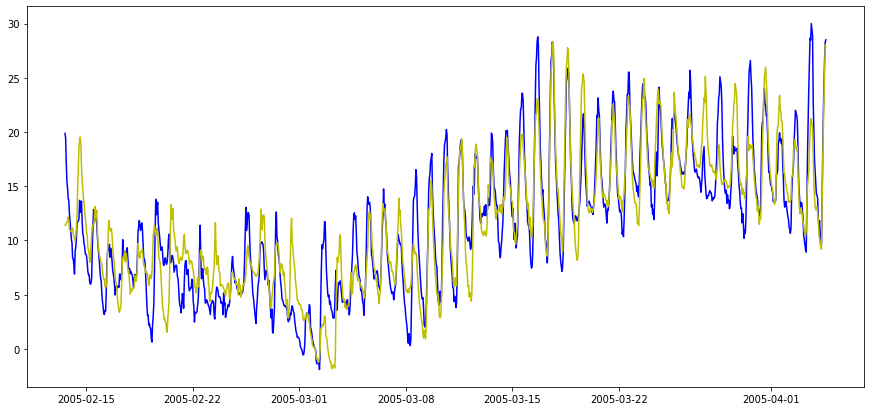

In [110]:
plt.figure(figsize=(15, 7))
plt.plot(test_y.index, test_y.values, color='b')
plt.plot(test_y.index, pipeline_lr.predict(test_X), color='y')
# plt.plot(test_y.index, pipeline_rf.predict(test_X), color='r')
# plt.plot(test_y.index, best_model.predict(test_X), color='c')
# plt.legend(['Original Temperature Series', 'Linear Reg', 'Random Forest', 'RF after tuning hyperparameter'])

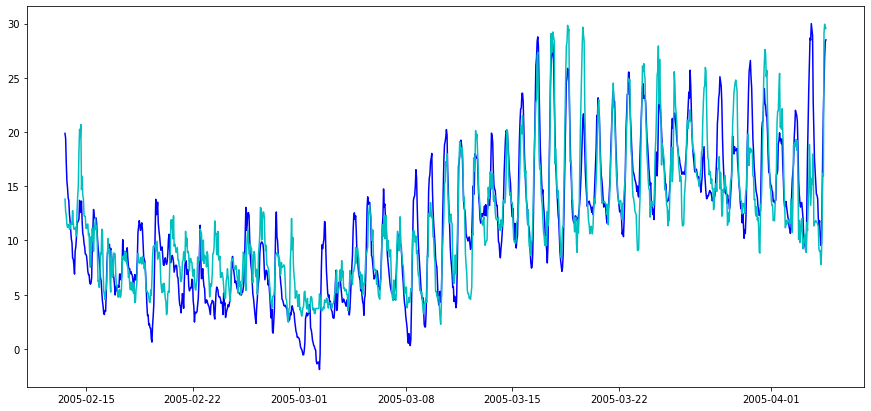

In [113]:
plt.figure(figsize=(15, 7))
plt.plot(test_y.index, test_y.values, color='b')
plt.plot(test_y.index, best_model.predict(test_X), color='c')

# Cyclic Features

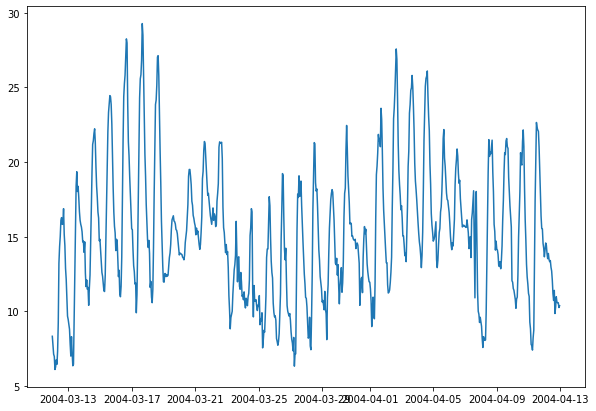

In [277]:
plt.figure(figsize=(10,7))
plt.plot(df.loc['2004-03-12 00:00:00':'2004-04-12 23:00:00'].index, 
                  df['T'].loc['2004-03-12 00:00:00':'2004-04-12 23:00:00'])

In [ ]:
df['T'].max()

In [ ]:
def cyclic_transform(data, col):
  max_val = data[col].max()
  col_norm = 2 * np.pi * data[col]/max_val
  df[col + '_sin'] = np.sin(col_norm)
  df[col + '_cos'] = np.cos(col_norm)
  return data

In [ ]:
df['Hour'] = df.index.hour
df['Day'] = df.index.day
df['Month'] = df.index.month

In [ ]:
df = cyclic_transform(df, 'Hour')
df = cyclic_transform(df, 'Day')
df = cyclic_transform(df, 'Month')

In [ ]:
# df['Hour_sin'][0:350].plot()
# plt.ylabel('T_sin')

In [ ]:
# # Trend of Temperature T by hour of the day, day of the week, month and season
# df['Hour'] = df.index.hour
# df['Week Day'] = df.index.day_name()
# df['Month'] = df.index.month

# # Extract season from pandas date
# def season(date):
#   year = str(date.year)
#   seasons = {'spring': pd.date_range(start='28-03-'+year, end = '27-06-'+year),
#              'summer': pd.date_range(start='28-06-'+year, end='29-09-'+year),
#              'autum': pd.date_range(start='30-09-'+year, end='28-12-'+year)
#              }
#   if date in seasons['spring']:
#     return 'spring'
#   if date in seasons['summer']:
#     return 'summer'
#   if date in seasons['autum']:
#     return 'autum'
#   else:
#     return 'winter'

# df['Season'] = df['Date'].map(season)

# fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(15, 8))
# index = 0
# axs = axs.flatten()
# for col, val in df.items():
#   if col in ['Hour', 'Week Day', 'Month', 'Season']:
#     sns.boxplot(y='T', x=col, data=df, ax=axs[index]).set_title('Trend of temperature over {}'.format(col))
#     index += 1
# plt.subplots_adjust(hspace=0.5)
# plt.tight_layout()
# plt.show()
